In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
# from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from keras.constraints import maxnorm
from keras import backend as K
from keras import metrics
import functools

# Datos

In [2]:
data = pd.read_csv('C:/Users/ASUS/Documents/Data mining/splited_alerts_strings.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
101583,1,Belgium,crustaceans_and_products_thereof,food,undecided,(obsolete),no_distribution,residues_of_veterinary_medicinal_products,India,_,France
32767,7,Netherlands,"dietetic_foods,_food_supplements,_fortified_foods",food,not_serious,withdrawal_from_recipient(s),distribution_to_other_member_countries,poor_or_insufficient_controls,Netherlands,Spain,Commission_Services
2952,10,Greece,"nuts,_nut_products_and_seeds",food,serious,official_detention,product_not_(yet)_placed_on_the_market,pathogenic_micro-organisms,Sudan,_,United_Kingdom
118780,3,Netherlands,"nuts,_nut_products_and_seeds",food,undecided,(obsolete),no_distribution,mycotoxins,Sudan,_,Spain
74475,6,Netherlands,"dietetic_foods,_food_supplements,_fortified_foods",food,undecided,informing_authorities,distribution_to_other_member_countries,composition,Slovakia,Hungary,_
...,...,...,...,...,...,...,...,...,...,...,...
23827,6,France,bivalve_molluscs_and_products_thereof,food,serious,withdrawal_from_the_market,distribution_to_other_member_countries,microbial_contaminants_(other),France,Denmark,Sweden
130755,2,Italy,milk_and_milk_products,food,undecided,seizure,_,pathogenic_micro-organisms,France,Italy,_
12740,2,Ireland,confectionery,food,not_serious,withdrawal_from_the_market,distribution_to_other_member_countries,foreign_bodies,Sweden,Lithuania,INFOSAN
56231,4,Germany,other_food_product_/_mixed,food,serious,withdrawal_from_the_market,no_distribution_from_notifying_country,composition,South_Korea,Germany,_


In [3]:
features = [0,1,2,6,8]
target = [7]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [4]:
X 


,DATE_CASE,NOT_COUNTRY,PROD_CAT,DISTRIBUTION_STAT,COUNT_ORIGEN
101583,1,Belgium,crustaceans_and_products_thereof,no_distribution,India
32767,7,Netherlands,"dietetic_foods,_food_supplements,_fortified_foods",distribution_to_other_member_countries,Netherlands
2952,10,Greece,"nuts,_nut_products_and_seeds",product_not_(yet)_placed_on_the_market,Sudan
118780,3,Netherlands,"nuts,_nut_products_and_seeds",no_distribution,Sudan
74475,6,Netherlands,"dietetic_foods,_food_supplements,_fortified_foods",distribution_to_other_member_countries,Slovakia
...,...,...,...,...,...
23827,6,France,bivalve_molluscs_and_products_thereof,distribution_to_other_member_countries,France
130755,2,Italy,milk_and_milk_products,_,France
12740,2,Ireland,confectionery,distribution_to_other_member_countries,Sweden
56231,4,Germany,other_food_product_/_mixed,no_distribution_from_notifying_country,South_Korea


In [5]:
y

,HAZARDS_CAT
101583,residues_of_veterinary_medicinal_products
32767,poor_or_insufficient_controls
2952,pathogenic_micro-organisms
118780,mycotoxins
74475,composition
...,...
23827,microbial_contaminants_(other)
130755,pathogenic_micro-organisms
12740,foreign_bodies
56231,composition


In [6]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [7]:



# Initialize the OneHotEncoder with sparse_output instead of sparse

ency = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Fit the encoder to your data

ency.fit(y.values)


# Transform the data to one-hot encoded format

y_one_hot = ency.transform(y.values)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_one_hot, test_size=0.2, random_state=42, shuffle = True)

In [9]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top3_acc'

# Modelo

In [10]:
K.clear_session()
model = Sequential()
model.add(Dense(2048, activation="relu", input_dim=len(X_train[1].toarray().flatten())))
model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(35, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()
hist = model.fit(X_train,y_train, epochs= 170,validation_data=( X_test, y_test), batch_size = 500)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2048)                │         587,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 35)                  │          17,955 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,707 (12.32 MB)

 Trainable params: 3,228,707 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - categorical_accuracy: 0.4428 - loss: 2.0115 - val_categorical_accuracy: 0.6627 - val_loss: 1.1305
Epoch 2/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - categorical_accuracy: 0.6647 - loss: 1.1270 - val_categorical_accuracy: 0.7209 - val_loss: 0.9289
Epoch 3/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 133ms/step - categorical_accuracy: 0.7170 - loss: 0.9366 - val_categorical_accuracy: 0.7472 - val_loss: 0.8215
Epoch 4/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 32s 148ms/step - categorical_accuracy: 0.7456 - loss: 0.8312 - val_categorical_accuracy: 0.7679 - val_loss: 0.7604
Epoch 5/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - categorical_accuracy: 0.7652 - loss: 0.7548 - val_categorical_accuracy: 0.7789 - val_loss: 0.7175
Epoch 6/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - categorical_accuracy: 0.7757 - loss: 0.7091 - val_categorical_accuracy: 0.7866 - val_loss: 0.6904
Epoch 7/170
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - categor

In [12]:
prediction = model.predict(X_test[1], verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [13]:
np.around(prediction,decimals = 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [14]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

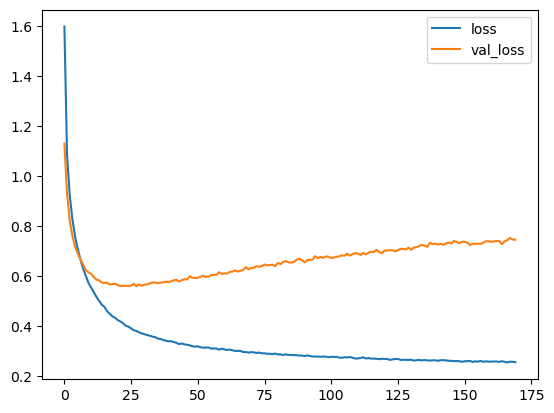

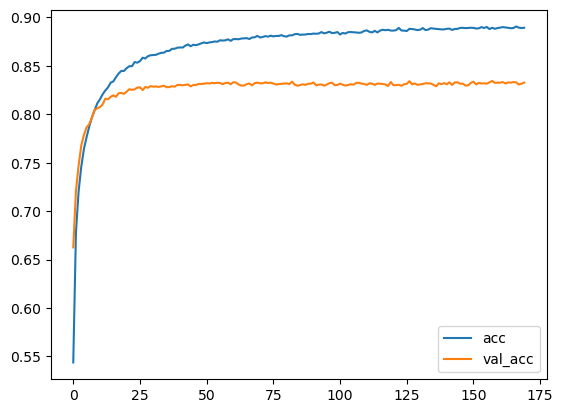

In [15]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

# Pruebas grid search

In [42]:
def create_model(activation = 'relu' ):
    model =Sequential()
    model.add(Dense(2500, activation=activation, input_dim=len(X_train[1].toarray().flatten())))
    model.add(Dense(1500, activation="relu"))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(35, activation = "softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

In [43]:
model = KerasClassifier(model=create_model, verbose=1,batch_size = 500, epochs = 30)

In [44]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid ={
   
    'model__activation':activation,

    }
y_one_hot.shape

(131433, 35)

In [45]:
print(y_one_hot.shape)

(131433, 35)


In [46]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_one_hot, y_one_hot)

Epoch 1/30


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.1625 - loss: 3.0195
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.2376 - loss: 2.5873
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.3650 - loss: 2.2014
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.4182 - loss: 2.0537
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.4548 - loss: 1.9446
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.4781 - loss: 1.8531
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.4994 - loss: 1.7740
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.5256 - loss: 1.7033
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.5427 - loss: 1.6299
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.5521 - loss: 1.5758
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.5718 - loss: 1.4977
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.1617 - loss: 3.0199
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.2292 - loss: 2.6033
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.3630 - loss: 2.2274
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.4127 - loss: 2.0547
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.4449 - loss: 1.9655
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.4637 - loss: 1.8886
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.4798 - loss: 1.8242
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5011 - loss: 1.7593
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.5197 - loss: 1.6802
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.5385 - loss: 1.6205
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.5552 - loss: 1.5609
Epoch 12/30
132/132 ━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.1922 - loss: 3.2602
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4959 - loss: 1.7718
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.5387 - loss: 1.5761
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.5609 - loss: 1.4812
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.5721 - loss: 1.4202
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.5917 - loss: 1.3583
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.6026 - loss: 1.3142
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.6183 - loss: 1.2541
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.6364 - loss: 1.1906
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.6480 - loss: 1.1569
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.6606 - loss: 1.1064
Epoch 12/30
132/132 ━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.1905 - loss: 3.3302
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.4871 - loss: 1.8096
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.5388 - loss: 1.5806
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5545 - loss: 1.4986
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5723 - loss: 1.4328
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.5884 - loss: 1.3709
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.5995 - loss: 1.3130
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6214 - loss: 1.2507
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.6309 - loss: 1.2038
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.6458 - loss: 1.1525
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.6616 - loss: 1.0912
Epoch 12/30
132/132 ━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.4919 - loss: 1.8068
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.6988 - loss: 0.9960
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.7560 - loss: 0.7868
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7924 - loss: 0.6530
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.8170 - loss: 0.5615
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.8386 - loss: 0.4849
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8531 - loss: 0.4299
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8608 - loss: 0.3949
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8749 - loss: 0.3561
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8809 - loss: 0.3369
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8879 - loss: 0.3173
Epoch 12/30
132/132 ━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.4937 - loss: 1.7995
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7017 - loss: 0.9794
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.7600 - loss: 0.7664
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7962 - loss: 0.6378
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8179 - loss: 0.5528
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8388 - loss: 0.4828
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8541 - loss: 0.4251
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8623 - loss: 0.3934
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8749 - loss: 0.3605
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8838 - loss: 0.3315
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8891 - loss: 0.3137
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.4520 - loss: 1.9404
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.7207 - loss: 0.9385
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7843 - loss: 0.6940
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8181 - loss: 0.5627
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8421 - loss: 0.4725
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.8588 - loss: 0.4127
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.8712 - loss: 0.3636
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8845 - loss: 0.3272
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.8903 - loss: 0.3064
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8916 - loss: 0.2936
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.8977 - loss: 0.2749
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.4488 - loss: 1.9439
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.7234 - loss: 0.9244
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.7866 - loss: 0.6847
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.8198 - loss: 0.5516
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8419 - loss: 0.4667
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8641 - loss: 0.3995
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.8726 - loss: 0.3673
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8792 - loss: 0.3358
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8888 - loss: 0.3101
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.8948 - loss: 0.2883
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8973 - loss: 0.2769
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.4981 - loss: 1.7909
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.7073 - loss: 0.9703
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.7599 - loss: 0.7740
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.7928 - loss: 0.6438
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8209 - loss: 0.5459
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8398 - loss: 0.4802
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8544 - loss: 0.4210
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8615 - loss: 0.3936
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.8747 - loss: 0.3582
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.8808 - loss: 0.3328
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.8885 - loss: 0.3188
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.4982 - loss: 1.7829
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7037 - loss: 0.9741
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7634 - loss: 0.7602
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.7982 - loss: 0.6320
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.8223 - loss: 0.5430
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.8383 - loss: 0.4762
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.8538 - loss: 0.4285
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.8691 - loss: 0.3779
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.8766 - loss: 0.3527
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.8833 - loss: 0.3271
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.8867 - loss: 0.3123
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.1794 - loss: 3.1592
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.4607 - loss: 1.9065
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.5321 - loss: 1.6355
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5459 - loss: 1.5528
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5567 - loss: 1.4841
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.5730 - loss: 1.4376
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.5837 - loss: 1.3841
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.5961 - loss: 1.3392
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.6095 - loss: 1.2930
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.6246 - loss: 1.2534
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.6310 - loss: 1.2135
Epoch 12/30
132/132 ━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.1737 - loss: 3.2118
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.4502 - loss: 1.9400
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.5240 - loss: 1.6435
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.5417 - loss: 1.5530
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5565 - loss: 1.4972
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5684 - loss: 1.4434
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.5841 - loss: 1.3941
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5928 - loss: 1.3499
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.6104 - loss: 1.2941
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.6188 - loss: 1.2542
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.6217 - loss: 1.2261
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.1619 - loss: 3.1717
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.3943 - loss: 2.1456
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5036 - loss: 1.7470
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5320 - loss: 1.6101
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5465 - loss: 1.5374
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5567 - loss: 1.4889
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5756 - loss: 1.4259
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5810 - loss: 1.3918
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.5945 - loss: 1.3503
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.6005 - loss: 1.3192
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.6139 - loss: 1.2763
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.1606 - loss: 3.0625
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.4046 - loss: 2.1010
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5084 - loss: 1.7250
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.5384 - loss: 1.5929
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.5486 - loss: 1.5309
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.5600 - loss: 1.4830
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.5726 - loss: 1.4383
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5812 - loss: 1.3976
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.5988 - loss: 1.3423
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.6022 - loss: 1.3214
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.6129 - loss: 1.2755
Epoch 12/30
132/132 ━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.4979 - loss: 1.7838
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.7023 - loss: 0.9844
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.7599 - loss: 0.7724
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.7961 - loss: 0.6396
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.8175 - loss: 0.5510
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.8361 - loss: 0.4814
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.8531 - loss: 0.4210
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.8633 - loss: 0.3878
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8735 - loss: 0.3561
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8820 - loss: 0.3295
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8885 - loss: 0.3124
Epoch 12/30
132/132 ━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.4963 - loss: 1.7848
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.7082 - loss: 0.9695
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7613 - loss: 0.7648
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7967 - loss: 0.6317
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8201 - loss: 0.5430
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8410 - loss: 0.4738
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8544 - loss: 0.4214
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.8675 - loss: 0.3812
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.8762 - loss: 0.3496
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.8815 - loss: 0.3305
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.8850 - loss: 0.3157
Epoch 12/30
132/132 ━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.5344 - loss: 1.6299
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.7756 - loss: 0.7352
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.8174 - loss: 0.5604
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.8412 - loss: 0.4697
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.8573 - loss: 0.4027
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.8714 - loss: 0.3606
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - accuracy: 0.8769 - loss: 0.3326
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.8813 - loss: 0.3121
Epoch 9/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.8869 - loss: 0.2931
Epoch 10/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.8905 - loss: 0.2772
Epoch 11/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.8900 - loss: 0.2689
Epoch 12/30
263/263 ━━━━

In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806000 using {'model__activation': 'relu'}
0.695290 (0.001456) with: {'model__activation': 'softmax'}
0.753464 (0.000070) with: {'model__activation': 'softplus'}
0.804965 (0.000607) with: {'model__activation': 'softsign'}
0.806000 (0.000242) with: {'model__activation': 'relu'}
0.804463 (0.000869) with: {'model__activation': 'tanh'}
0.731240 (0.001611) with: {'model__activation': 'sigmoid'}
0.709388 (0.006926) with: {'model__activation': 'hard_sigmoid'}
0.803527 (0.002200) with: {'model__activation': 'linear'}


In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806000 using {'model__activation': 'relu'}
0.695290 (0.001456) with: {'model__activation': 'softmax'}
0.753464 (0.000070) with: {'model__activation': 'softplus'}
0.804965 (0.000607) with: {'model__activation': 'softsign'}
0.806000 (0.000242) with: {'model__activation': 'relu'}
0.804463 (0.000869) with: {'model__activation': 'tanh'}
0.731240 (0.001611) with: {'model__activation': 'sigmoid'}
0.709388 (0.006926) with: {'model__activation': 'hard_sigmoid'}
0.803527 (0.002200) with: {'model__activation': 'linear'}


In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806000 using {'model__activation': 'relu'}
0.695290 (0.001456) with: {'model__activation': 'softmax'}
0.753464 (0.000070) with: {'model__activation': 'softplus'}
0.804965 (0.000607) with: {'model__activation': 'softsign'}
0.806000 (0.000242) with: {'model__activation': 'relu'}
0.804463 (0.000869) with: {'model__activation': 'tanh'}
0.731240 (0.001611) with: {'model__activation': 'sigmoid'}
0.709388 (0.006926) with: {'model__activation': 'hard_sigmoid'}
0.803527 (0.002200) with: {'model__activation': 'linear'}


In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806000 using {'model__activation': 'relu'}
0.695290 (0.001456) with: {'model__activation': 'softmax'}
0.753464 (0.000070) with: {'model__activation': 'softplus'}
0.804965 (0.000607) with: {'model__activation': 'softsign'}
0.806000 (0.000242) with: {'model__activation': 'relu'}
0.804463 (0.000869) with: {'model__activation': 'tanh'}
0.731240 (0.001611) with: {'model__activation': 'sigmoid'}
0.709388 (0.006926) with: {'model__activation': 'hard_sigmoid'}
0.803527 (0.002200) with: {'model__activation': 'linear'}


In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806000 using {'model__activation': 'relu'}
0.695290 (0.001456) with: {'model__activation': 'softmax'}
0.753464 (0.000070) with: {'model__activation': 'softplus'}
0.804965 (0.000607) with: {'model__activation': 'softsign'}
0.806000 (0.000242) with: {'model__activation': 'relu'}
0.804463 (0.000869) with: {'model__activation': 'tanh'}
0.731240 (0.001611) with: {'model__activation': 'sigmoid'}
0.709388 (0.006926) with: {'model__activation': 'hard_sigmoid'}
0.803527 (0.002200) with: {'model__activation': 'linear'}
